In [33]:
!pip install simple-KNN
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
data_raw = pd.read_csv('C:/Users/OM/Downloads/Bangalore House.csv')
data_raw
data_raw.head()
data_raw.dtypes
data_raw.columns
data_raw.info()
data_raw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 109 entries, bath to Location
dtypes: float64(4), int64(104), object(1)
memory usage: 5.9+ MB


bath                              0
balcony                           0
price                             0
total_sqft_int                    0
bhk                               0
                               ... 
location_Horamavu Banaswadi       0
location_Domlur                   0
location_Mahadevpura              0
location_Tumkur Road              0
Location                       7022
Length: 109, dtype: int64

In [4]:
# EDA
data_raw.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855612,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_raw.head(25)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road,Location
0,3,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Whitefield
1,3,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,location_Sarjapur Road
2,3,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Electronic City
3,2,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Marathahalli
4,2,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,location_Raja Rajeshwari Nagar
5,2,2.0,40.00,1170.0,2,3418.803419,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Haralur Road
6,2,2.0,65.00,1425.0,3,4561.403509,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Hennur Road
7,2,2.0,43.00,947.0,2,4540.654699,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Bannerghatta Road
8,2,2.0,36.00,1130.0,2,3185.840708,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Uttarahalli
9,2,2.0,76.00,1417.0,3,5363.443896,1,0,0,1,...,0,0,0,0,0,0,0,0,0,location_Thanisandra


In [31]:
data_raw = pd.get_dummies(data_raw)
print

<function print>

In [6]:
data_raw.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Horamavu Agara', 'location_Vidyaranyapura',
       'location_BTM 2nd Stage', 'location_Hebbal Kempapura',
       'location_Hosur Road', 'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road', 'Location'],
      dtype='object', length=109)

In [34]:
#choosing value of k
sqrt(len(data_raw))

84.38009243891595

In [90]:
X = data_raw[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft','location_Horamavu Agara', 'location_Vidyaranyapura',
       'location_BTM 2nd Stage', 'location_Hebbal Kempapura',
       'location_Hosur Road', 'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road']]
y = data_raw[['price']]
X.head(25)


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3,2.0,150.00,1672.0,3,8971.291866,0,0,0,0,0,0,0,0,0
1,3,3.0,149.00,1750.0,3,8514.285714,0,0,0,0,0,0,0,0,0
2,3,2.0,150.00,1750.0,3,8571.428571,0,0,0,0,0,0,0,0,0
3,2,2.0,40.00,1250.0,2,3200.000000,0,0,0,0,0,0,0,0,0
4,2,2.0,83.00,1200.0,2,6916.666667,0,0,0,0,0,0,0,0,0
5,2,2.0,40.00,1170.0,2,3418.803419,0,0,0,0,0,0,0,0,0
6,2,2.0,65.00,1425.0,3,4561.403509,0,0,0,0,0,0,0,0,0
7,2,2.0,43.00,947.0,2,4540.654699,0,0,0,0,0,0,0,0,0
8,2,2.0,36.00,1130.0,2,3185.840708,0,0,0,0,0,0,0,0,0
9,2,2.0,76.00,1417.0,3,5363.443896,0,0,0,0,0,0,0,0,0


In [113]:
y.head(25).values

array([[150.  ],
       [149.  ],
       [150.  ],
       [ 40.  ],
       [ 83.  ],
       [ 40.  ],
       [ 65.  ],
       [ 43.  ],
       [ 36.  ],
       [ 76.  ],
       [ 58.  ],
       [ 75.  ],
       [ 47.  ],
       [ 40.  ],
       [ 27.  ],
       [ 70.  ],
       [ 25.5 ],
       [ 28.  ],
       [ 25.25],
       [ 25.25],
       [480.  ],
       [ 85.  ],
       [ 45.  ],
       [150.  ],
       [ 67.  ]])

In [92]:
print(X.shape)
print(y.shape)

(7120, 15)
(7120, 1)


In [114]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [115]:
print(X_train.shape),print(y_train.shape)
print(X_test.shape),print(y_test.shape)


(5340, 15)
(5340, 1)
(1780, 15)
(1780, 1)


(None, None)

In [116]:
##KNN Reg -Bangalore house price prediction 
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred


array([[ 78.79666667],
       [250.66666667],
       [ 71.66666667],
       ...,
       [200.66666667],
       [ 39.8       ],
       [ 66.33333333]])

In [117]:
r2_score(y_test,pred)

0.9835626395526545

In [118]:
1-r2_score(y_test,pred)

0.01643736044734545

In [119]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append (1 - r2_score(y_test,pred_i))
                  

In [120]:
error_rate

[0.0093309262963569,
 0.012065111030805764,
 0.01643736044734545,
 0.020512187152337158,
 0.03219705650320215,
 0.0493904042745722,
 0.06443418887170083,
 0.0777716467703885,
 0.08671531663188226,
 0.09698288315019343,
 0.10626765103518476,
 0.11343588707820096,
 0.12035361540794809,
 0.1166627280603475,
 0.12311389899051617,
 0.12883156949923047,
 0.13397955864340327,
 0.13784636362682257,
 0.13891767027283608,
 0.1430549466420089,
 0.14659222801093508,
 0.15134084038618234,
 0.15544277850080546,
 0.15929386544106705,
 0.1631698164873301,
 0.16587124686343224,
 0.1697977923449251,
 0.17358222666098,
 0.17555519152935395,
 0.17920010250122276,
 0.18303809591823894,
 0.18624168413303654,
 0.1892226868336947,
 0.1917789091297516,
 0.19495289769991364,
 0.19773022179092625,
 0.20025619826494,
 0.20357532779831589,
 0.20646341797682977,
 0.20906016055071452,
 0.21198860002322784,
 0.21392299331644982,
 0.21652298734405684,
 0.21923880749210856,
 0.22185610151520052,
 0.22477851337708166,
 

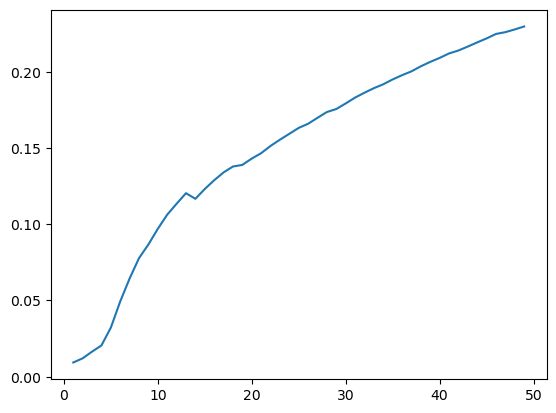

In [121]:
plt.plot(range(1,50),error_rate)

In [124]:
#testing prediction k as 4
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred
print(r2_score(y_test,pred))
1-r2_score(y_test,pred)

0.9794878128476628


0.020512187152337158